# 0:

In [1]:
import pystan

In [2]:
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'

In [3]:
model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


In [4]:
y = model.sampling().extract()['y']

In [5]:
y.mean()

-0.0013616018041348755

# 1:

In [6]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

INFO:matplotlib.font_manager:generated new fontManager
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [8]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)

In [9]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}

# Compile the model
sm = pystan.StanModel(model_code=model)

# Train the model and generate samples
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cb4cc9c2a04d0e34d711077557307fb7 NOW.


# 2:

In [10]:
import pystan
import pickle
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import statsmodels.api as statmod
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

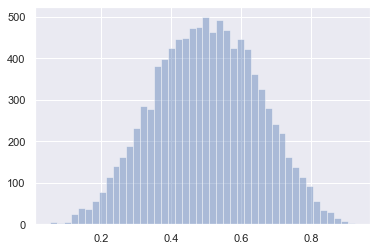

In [11]:
sns.distplot(np.random.beta(5,5, size=10000),kde=False)

In [12]:
# bernoulli model
model_code = """
    data {
      int<lower=0> N;
      int<lower=0,upper=1> y[N];
    }
    parameters {
      real<lower=0,upper=1> theta;
    }
    model {
      theta ~ beta(5, 5);
      for (n in 1:N)
          y[n] ~ bernoulli(theta);
    }
    """
data = dict(N=4, y=[0, 0, 0, 0])
model = pystan.StanModel(model_code=model_code)
fit = model.sampling(data=data,iter=4000, chains=4, warmup=1000)
la = fit.extract(permuted=True)  # return a dictionary of arrays
print(fit.stansummary())

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d3835c4370ff5e66f1e88bd3eac647ff NOW.


Inference for Stan model: anon_model_d3835c4370ff5e66f1e88bd3eac647ff.
4 chains, each with iter=4000; warmup=1000; thin=1; 
post-warmup draws per chain=3000, total post-warmup draws=12000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.36  1.9e-3   0.12   0.14   0.27   0.35   0.44   0.61   4088    1.0
lp__   -9.65    0.01   0.74 -11.77  -9.82  -9.36  -9.18  -9.13   5454    1.0

Samples were drawn using NUTS at Fri Apr  8 00:41:46 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


# 3:

In [13]:
cars_data = pd.read_csv('https://raw.githubusercontent.com/sergiosonline/sergiosonline.github.io/master/files/cars.csv').set_index('name')
print(cars_data.shape)
cars_data.head()

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,American
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,American
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,American
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
ford torino,17.0,8,302.0,140,3449,10.5,70,American


C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


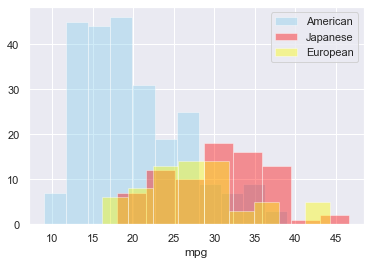

In [14]:
sns.distplot(cars_data[cars_data['origin']=='American']['mpg'],color="skyblue", label="American",kde=False)
sns.distplot(cars_data[cars_data['origin']=='Japanese']['mpg'],color="red", label="Japanese",kde=False)
sns.distplot(cars_data[cars_data['origin']=='European']['mpg'],color="yellow", label="European",kde=False)
plt.legend()

C:\Users\danie\anaconda3\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\danie\anaconda3\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\danie\anaconda3\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\danie\anaconda3\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\danie\anaconda3\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-l

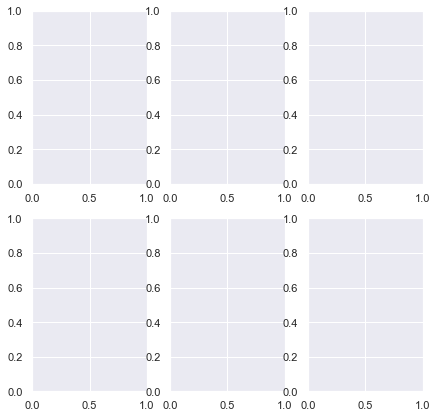

In [15]:
f, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=False)
sns.relplot(x="cylinders", y="mpg", data=cars_data, ax=axes[0, 0]);
sns.relplot(x="displacement", y="mpg", data=cars_data, ax=axes[0, 1]);
sns.relplot(x="horsepower", y="mpg", data=cars_data, ax=axes[0, 2]);
sns.relplot(x="acceleration", y="mpg", data=cars_data, ax=axes[1, 0]);
sns.relplot(x="year", y="mpg", data=cars_data, ax=axes[1, 1]);
sns.relplot(x="weight", y="mpg", data=cars_data, ax=axes[1, 2]);
# close pesky empty plots
for num in range(2,8):
    plt.close(num)
    
plt.show()

In [16]:
from numpy import random
from sklearn import preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
random.seed(12345)
#cars_data = cars_data.set_index('name')
y = cars_data['mpg']
X = cars_data.loc[:, cars_data.columns != 'mpg']
X = X.loc[:, X.columns != 'name']
X = pd.get_dummies(X, prefix_sep='_', drop_first=False) 
X = X.drop(columns=["origin_European"]) # This is our reference category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_American,origin_Japanese
name,,,,,,,,
ford pinto runabout,4,122.0,86,2226,16.5,72,1,0
plymouth duster,6,198.0,95,2833,15.5,70,1,0
fiat 128,4,90.0,75,2108,15.5,74,0,0
volkswagen scirocco,4,89.0,71,1990,14.9,78,0,0
ford galaxie 500,8,429.0,198,4341,10.0,70,1,0


In [17]:
# Succinct matrix notation
cars_code = """
data {
    int<lower=1> N; // number of training samples
    int<lower=0> K; // number of predictors - 1 (intercept)
    matrix[N, K] x; // matrix of predictors
    vector[N] y_obs; // observed/training mpg
    
    int<lower=1> N_new;
    matrix[N_new, K] x_new;
}
parameters {
    real alpha;
    vector[K] beta;
    real<lower=0> sigma;
    
    vector[N_new] y_new;
}
transformed parameters {
    vector[N] theta;
    theta = alpha + x * beta;
}
model {
    sigma ~ exponential(1);
    alpha ~ normal(0, 6);
    beta ~ multi_normal(rep_vector(0, K), diag_matrix(rep_vector(1, K)));
    y_obs ~ normal(theta, sigma);
    
    y_new ~ normal(alpha + x_new * beta, sigma); // prediction model
}
"""

In [18]:
cars_dat = {'N': X_train.shape[0],
            'N_new': X_test.shape[0],
            'K': X_train.shape[1],
            'y_obs': y_train.values.tolist(),
            'x': np.array(X_train),
            'x_new': np.array(X_test)}
sm = pystan.StanModel(model_code=cars_code)
fit = sm.sampling(data=cars_dat, iter=6000, chains=8)
# Save fitted model!
with open('bayes-cars.pkl', 'wb') as f:
    pickle.dump(sm, f, protocol=pickle.HIGHEST_PROTOCOL)
# Extract and print the output of our model
la = fit.extract(permuted=True)
print(fit.stansummary())

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e1cdc2d82889a4739ef149392affdda1 NOW.


Inference for Stan model: anon_model_e1cdc2d82889a4739ef149392affdda1.
8 chains, each with iter=6000; warmup=3000; thin=1; 
post-warmup draws per chain=3000, total post-warmup draws=24000.

              mean se_mean     sd    2.5%     25%     50%     75%   97.5%  n_eff   Rhat
alpha        -8.34    0.02   3.81  -15.76  -10.93   -8.36   -5.79   -0.88  28170    1.0
beta[1]      -0.48  1.9e-3   0.33   -1.13   -0.71   -0.48   -0.27    0.16  31395    1.0
beta[2]       0.02  4.7e-5 8.0e-3  6.1e-3    0.02    0.02    0.03    0.04  28633    1.0
beta[3]      -0.02  8.5e-5   0.01   -0.04   -0.03   -0.02 -6.9e-3    0.01  27912    1.0
beta[4]    -7.0e-3  4.0e-6 6.9e-4 -8.3e-3 -7.4e-3 -7.0e-3 -6.5e-3 -5.6e-3  30027    1.0
beta[5]        0.1  5.8e-4    0.1    -0.1    0.03     0.1    0.17     0.3  30604    1.0
beta[6]       0.69  2.6e-4   0.05     0.6    0.66    0.69    0.72    0.78  30218    1.0
beta[7]      -1.75  2.9e-3   0.51   -2.76   -2.09   -1.75    -1.4   -0.73  31701    1.0
beta[8]       0.37

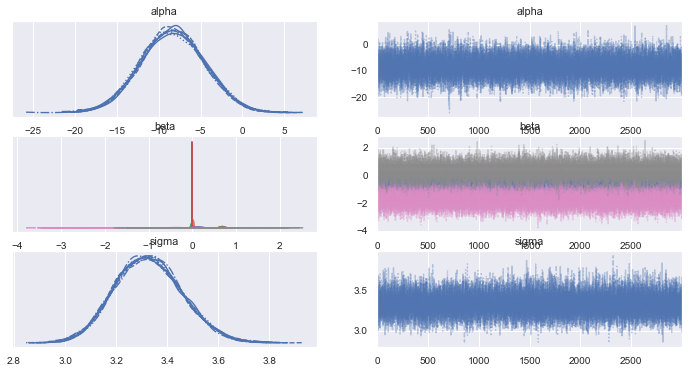

In [19]:
ax = az.plot_trace(fit, var_names=["alpha","beta","sigma"])

In [20]:
axes = az.plot_forest(
    post_data,
    kind="forestplot",
    var_names= ["beta","sigma"],
    combined=True,
    ridgeplot_overlap=1.5,
    colors="blue",
    figsize=(9, 4),
)

NameError: name 'post_data' is not defined

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\danie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


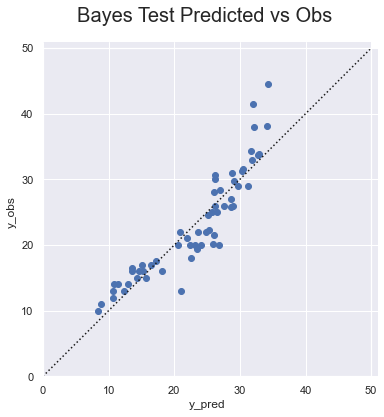

In [21]:
dff = pd.DataFrame({'y_pred':la['y_new'].mean(0), 'y_obs':y_test})
grid = sns.JointGrid(dff.y_pred, dff.y_obs, space=0, height=6, ratio=50,
                    xlim=(0,50), ylim=(0,50))
grid.plot_joint(plt.scatter, color="b")
x0, x1 = grid.ax_joint.get_xlim()
y0, y1 = grid.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
grid.ax_joint.plot(lims, lims, ':k')
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Bayes Test Predicted vs Obs',fontsize=20)
plt.show()

In [22]:
bay_test_mse = metrics.mean_squared_error(y_test, la['y_new'].mean(0))
print('Bayes Test MSE:', bay_test_mse)
##### Bayes Test MSE: 10.968931376358526

Bayes Test MSE: 10.970243217749834


In [23]:
az.style.use("arviz-darkgrid")
sns.relplot(x="weight", y="mpg")
data=pd.DataFrame({'weight':X_test['weight'],'mpg':y_test})
az.plot_hpd(X_test['weight'], la['y_new'], color="k", plot_kwargs={"ls": "--"})

ValueError: Could not interpret value `weight` for parameter `x`

C:\Users\danie\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'arviz' has no attribute 'plot_hpd'

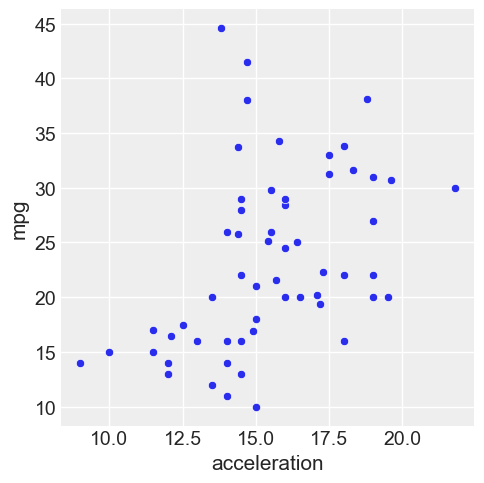

In [24]:
sns.relplot(x="acceleration", y="mpg",
            data=pd.DataFrame({'acceleration':X_test['acceleration'],'mpg':y_test}))
az.plot_hpd(X_test['acceleration'], la['y_new'], color="k", plot_kwargs={"ls": "--"})